In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jun 30 09:34:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [55]:
import os
import numpy as np # Csv study
import pandas as pd # Dataframe and CSV Study
import matplotlib.pyplot as plt # Visualize the images
import matplotlib.image as mpimg # Same as above
import seaborn as sns # Visualizing the data in plots
import cv2 # Image Handeling

# For preprocessing and model building
import keras # Model/Architecture Building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from keras.models import model_from_json
from keras.models import load_model

In [56]:
from sklearn import preprocessing

In [4]:
path = '/content/gdrive/MyDrive/'
os.listdir(path)

['Book report.gslides',
 'NAPAYJ0.html.gdoc',
 'IMG_1994 (2).JPG',
 'IMG_1995 (1).JPG',
 'IMG_1996 (2).JPG',
 'IMG_1997 (2).JPG',
 'IMG_1998 (2).JPG',
 'IMG_2001 (2).JPG',
 'IMG_2002 (1).JPG',
 'IMG_2003 (2).JPG',
 'IMG_2004 (2).JPG',
 'IMG_2005 (2).JPG',
 'IMG_1996 (1).JPG',
 'IMG_1994 (1).JPG',
 'IMG_1997 (1).JPG',
 'IMG_1998 (1).JPG',
 'IMG_2001 (1).JPG',
 'IMG_2003 (1).JPG',
 'IMG_2004 (1).JPG',
 'IMG_2005 (1).JPG',
 'IMG_2006 (1).JPG',
 'IMG_2010 (1).JPG',
 'IMG_2007.JPG',
 'IMG_2015 (1).JPG',
 'IMG_2016.JPG',
 'IMG_2037.JPG',
 'IMG_2038 (1).JPG',
 'IMG_2039 (1).JPG',
 'IMG_2041.JPG',
 'IMG_2043 (1).JPG',
 'IMG_2044 (1).JPG',
 'IMG_2046 (1).JPG',
 'IMG_2051.JPG',
 'IMG_2004.JPG',
 'IMG_2003.JPG',
 'IMG_2015.JPG',
 'IMG_2005.JPG',
 'IMG_2046.JPG',
 'IMG_1994.JPG',
 'IMG_1998.JPG',
 'IMG_2049.JPG',
 'IMG_2000.JPG',
 'IMG_2044.JPG',
 'IMG_2001.JPG',
 'IMG_2048.JPG',
 'IMG_2010.JPG',
 'IMG_2053.JPG',
 'IMG_2039.JPG',
 'IMG_1997.JPG',
 'IMG_2002.JPG',
 'IMG_1995.JPG',
 'IMG_1996.JPG',


In [5]:
train = path + '/train.csv'

In [6]:
# Reading .csv file
train_df = pd.read_csv(path + '/train.csv')
train_df.head()

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [7]:
#Encoding the labels to convert text labels into integer values
label_encoder = preprocessing.LabelEncoder()
train_df['target_code']= label_encoder.fit_transform(train_df['target'])


In [8]:
train_df['target_code']

0       3
1       1
2       1
3       2
4       0
       ..
5995    2
5996    0
5997    0
5998    1
5999    0
Name: target_code, Length: 6000, dtype: int64

In [9]:
from keras.preprocessing.image import ImageDataGenerator
#Generating Image Data with ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [10]:
#loading the data and labels from train.csv file and passing the fashion images directory
train_generator=datagen.flow_from_dataframe(dataframe=train_df,
                                            directory=path + '/fashion/',
                                            x_col="images", y_col="target",
                                            class_mode="categorical",
                                            shuffle=False,
                                            target_size=(80,80),
                                            batch_size=32)

Found 6000 validated image filenames belonging to 4 classes.


In [11]:
train_images = np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
print(train_images.shape)

(6000, 80, 80, 3)


In [71]:
print(train_images.shape)

(6000, 80, 80, 3)


In [12]:
train_labels = np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(train_labels.shape)

(6000, 4)


In [13]:
#Converting train_labels into a dataframe and adding sparse labels to One-Hot Encoded labels
train_labels_df = pd.DataFrame(train_labels)
train_labels_df["label"] = train_labels_df.idxmax(1)

In [15]:
#from tensorflow.keras.applications.vgg16 import VGG16

#model = VGG16(weights='imagenet', include_top = False)
#features = model.predict(train_images)
#print(features.shape)
#print(features)

58892288/58889256 [==============================] - 0s 0us/step
(6000, 2, 2, 512)
[[[[0.7005776  0.         0.10261267 ... 0.         0.0474245
    0.        ]
   [1.3670032  0.         0.         ... 0.         0.10709065
    0.        ]]

  [[1.6682777  0.         0.84606487 ... 0.         0.
    0.        ]
   [2.15841    0.         0.05654669 ... 0.         0.
    0.        ]]]


 [[[0.38446638 0.         0.         ... 0.         0.
    0.        ]
   [0.6978521  0.         0.         ... 0.         0.16811416
    0.        ]]

  [[0.5857967  0.         0.         ... 0.         0.
    0.        ]
   [0.76262105 0.         0.         ... 0.         0.
    0.        ]]]


 [[[0.23779702 0.         0.         ... 0.         0.34221616
    0.        ]
   [0.         0.         0.         ... 0.         0.51823187
    0.        ]]

  [[0.56276333 0.         0.         ... 0.         0.16996664
    0.        ]
   [0.14519966 0.         0.         ... 0.         0.06387228
    0.      

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

# Setting up the VGG16 base model
img_width, img_height = 80, 80
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_width, img_height, 3))
for layer in model.layers:
    layer.trainable = False
model.summary()
features = model.predict(train_images)
print(features.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [16]:
train_labels_df["label"]

0       3
1       1
2       1
3       2
4       0
       ..
5995    2
5996    0
5997    0
5998    1
5999    0
Name: label, Length: 6000, dtype: int64

In [17]:
#flattening the extracted features data to create a dataframe
train_features = features.reshape(features.shape[0],-1)

In [18]:
#creating a dataframe of the extracted features
img_df = pd.DataFrame(train_features)
img_df["label"] = train_labels_df["label"]   #adding label to the features data

In [19]:
img_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,1.021385,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.066098,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.661660,0.759806,0.0,0.0,0.000000,0.096954,0.427908,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.490744,1.592741,0.00000,0.000000,0.000000,0.0,1.778946,0.0,1.335853,0.000000,1.082435,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,2.373758,0.000000,0.000000,0.000000,0.000000,0.000000,0.760228,0.0,2.203420,0.368500,0.000000,0.000000,0.0,0.463768,0.0,0.0,0.000000,0.0,3
1,0.455262,0.0,0.000000,0.0,0.625228,0.0,0.258656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.015523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.390076,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.141625,0.788709,0.00000,0.000000,0.000000,0.0,0.494545,0.0,0.000000,1.012871,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.864980,0.296408,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.434710,0.000000,0.0,1.535860,0.912020,0.000000,0.000000,0.0,0.536330,0.0,0.0,0.000000,0.0,1
2,0.313359,0.0,0.000000,0.0,0.163326,0.0,0.152389,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.023262,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436981,0.000000,0.0,0.0,0.024226,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.029421,0.811006,0.186531,1.37924,0.000000,0.005949,0.0,0.527219,0.0,0.000000,0.779351,0.000000,0.0,0.004391,0.000000,0.000000,0.0,0.000000,0.612802,0.096803,0.0,0.000000,0.000000,0.000000,0.000000,0.193021,1.117028,0.000000,0.0,0.301038,1.084471,0.000000,0.000000,0.0,0.244399,0.0,0.0,0.001858,0.0,1
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.131549,0.292215,0.0,0.613982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.937866,0.000000,0.0,0.0,0.075740,0.000000,0.257971,0.0,0.084310,0.0,0.000000,0.307941,0.0,0.0,...,0.585038,2.355613,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.861408,0.000000,0.0,0.000000,0.005660,1.483713,0.0,0.919446,0.000000,0.000000,0.000000,0.000000,2.384649,0.670507,0.0,0.241677,0.054818,0.000000,0.000000,0.0,0.251663,0.0,0.0,0.000000,0.0,2
4,0.602541,0.0,0.000000,0.0,0.000000,0.0,0.278563,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.439003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395200,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.103541,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,1.851708,0.000000,0.00000,0.000000,0.497809,0.0,0.062763,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.664446,0.000000,0.0,0.680864,0.000000,0.000000,0.000000,0.000000,0.888388,0.795534,0.0,1.130921,0.498622,0.000000,0.000000,0.0,0.323511,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.119287,0.285892,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801677,0.000000,0.0,0.0,0.060471,0.000000,0.000000,0.0,0.364505,0.0,0.000000,0.000000,0.0,0.0,...,0.656181,1.395210,0.148137,0.00000,1.142828,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.098496,0.0,0.000000,0.449827,0.423564,0.0,0.000000,0.000000,0.000000,0.0,0.252035,0.194046,0.048767,0.000000,0.279819,0.000000,0.917744,0.0,0.000000,0.000000,0.282373,0.000000,0.0,1.370404,0.0,0.0,0.028410,0.0,2
5996,1.136669,0.0,0.872615,0.0,0.00

In [20]:
#X = np.array(img_df)

In [21]:
#X.shape

(6000, 2049)

In [22]:
#y = np.array(img_df.drop(['label'],axis=1))
#y.shape

(6000, 2048)

In [20]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    train_labels,
                                                    random_state=42,
                                                    stratify = train_labels,
                                                    test_size=0.2)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4800, 2, 2, 512) (1200, 2, 2, 512) (4800, 4) (1200, 4)


In [23]:
# Randomly separate 10% of the images as our validation set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20) 

In [61]:
epochs = 50

model = Sequential()
model.add(Conv2D(input_shape=(80,80,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(GlobalAveragePooling2D(input_shape=(2,2,512)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))


In [62]:
# Summary of the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 80, 80, 64)        1792      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 80, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 40, 40, 128)       73856     
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 40, 40, 128)       147584    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 20, 20, 256)     

In [63]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.layers import GlobalAveragePooling2D

In [65]:
epochs = 50

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(2,2,512)))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_12  (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 2052      
Total params: 2,052
Trainable params: 2,052
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile model
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [67]:
# Train model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 1.0985 - acc: 0.5598 - val_loss: 0.7138 - val_acc: 0.7667
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6808 - acc: 0.7835 - val_loss: 0.5680 - val_acc: 0.8300
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.5466 - acc: 0.8251 - val_loss: 0.5036 - val_acc: 0.8425
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4889 - acc: 0.8466 - val_loss: 0.4595 - val_acc: 0.8492
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4399 - acc: 0.8549 - val_loss: 0.4367 - val_acc: 0.8525
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.4067 - acc: 0.8682 - val_loss: 0.4129 - val_acc: 0.8633
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.3997 - acc: 0.8721 - val_loss: 0.3941 - val_acc: 0.8700
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.

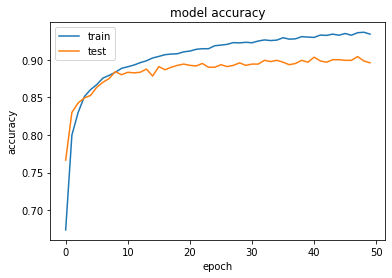

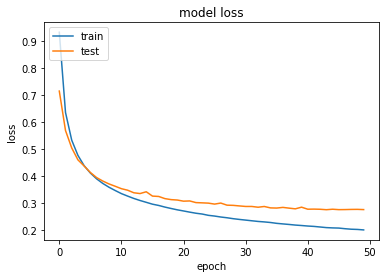

In [69]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
# evaluate the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the train set
scores = model.evaluate(X_train, y_train, verbose=0)
print("Final train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Final test acc: 89.58%
Final train acc: 93.42%


In [76]:
img = image.load_img(path + '/predictImages/' +'prod4.jpg',target_size=(2,2,512))
img = image.img_to_array(img)
img = img/255

In [77]:
classes = np.array(train_df.columns[2:])
proba = model.predict(img.reshape(1,2,2,512))
among4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[among4[i]])+" ({:.3})".format(proba[0][among4[i]]))
plt.imshow(img)

ValueError: ignored